A new coronavirus designated 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province
This a big opportunity to check our abilities with python and graphs

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import math
import seaborn as sns
import geopandas as gpd  # for geo plotting
import datetime as dt
import folium
from folium.plugins import HeatMap, MarkerCluster
import plotly.express as px

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
cov_deaths =  pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
cov_confirmed =  pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
cov_recoverd =  pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")
cov_open_list = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
cov_papers = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv")
covid19 = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
# covid19.head()

****How many Confirmed, Deaths and recovered****

In [3]:
temp  =  covid19.groupby ('ObservationDate')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp[temp.ObservationDate == temp.ObservationDate.max()]  #last day
temp['Global Mortality %'] = temp['Deaths']/temp['Confirmed']*100
temp['Global Recovery %'] = temp['Recovered']/temp['Confirmed']*100
temp.style.background_gradient(cmap='Pastel1')

,ObservationDate,Confirmed,Deaths,Recovered,Global Mortality %,Global Recovery %
67,03/29/2020,720117,33925,149082,4.71104,20.7025


**Check the mortality rate during the last week**

In [4]:

for i in range(7):    
    x = dt.datetime.today() - dt.timedelta(days=i+2) # format the date to ddmmyyyy
    x = x.strftime ('%m/%d/%Y')
    temp2  =  covid19.groupby ('ObservationDate')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
    temp2 = temp2[temp2.ObservationDate == x]  #last day
    temp2['Global Mortality %'] = temp2['Deaths']/temp2['Confirmed']*100
    temp2['Global Recovery %'] = temp2['Recovered']/temp2['Confirmed']*100
    temp2.style.background_gradient(cmap='coolwarm')
#     print(temp2)
    print (temp2)

   ObservationDate  Confirmed   Deaths  Recovered  Global Mortality %  \
66      03/28/2020   660706.0  30652.0   139415.0             4.63928   

    Global Recovery %  
66          21.100913  
   ObservationDate  Confirmed   Deaths  Recovered  Global Mortality %  \
65      03/27/2020   593291.0  27198.0   130915.0             4.58426   

    Global Recovery %  
65            22.0659  
   ObservationDate  Confirmed   Deaths  Recovered  Global Mortality %  \
64      03/26/2020   529591.0  23970.0   122150.0            4.526134   

    Global Recovery %  
64          23.064969  
   ObservationDate  Confirmed   Deaths  Recovered  Global Mortality %  \
63      03/25/2020   467594.0  21181.0   113770.0            4.529784   

    Global Recovery %  
63          24.330937  
   ObservationDate  Confirmed   Deaths  Recovered  Global Mortality %  \
62      03/24/2020   417966.0  18615.0   107705.0            4.453712   

    Global Recovery %  
62          25.768842  
   ObservationDate  Confi

**Confirmed Cases per countries**

In [5]:
cntry  = covid19[covid19.ObservationDate == covid19.ObservationDate.max()].groupby ('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().sort_values(by='Confirmed', ascending=False)
cntry.style.background_gradient(cmap='Greys')

,Confirmed,Deaths,Recovered
Country/Region,,,
US,140886,2467,2665
Italy,97689,10779,13030
Mainland China,81444,3300,75460
Spain,80110,6803,14709
Germany,62095,533,9211
France,40708,2611,7226
Iran,38309,2640,12391
UK,19780,1231,151
Switzerland,14829,300,1595


**Deaths cases per country**

In [6]:
cntry  = covid19[covid19.ObservationDate == covid19.ObservationDate.max()].groupby ('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().sort_values(by='Deaths', ascending=False)
cntry.style.background_gradient(cmap='cividis')

,Confirmed,Deaths,Recovered
Country/Region,,,
Italy,97689,10779,13030
Spain,80110,6803,14709
Mainland China,81444,3300,75460
Iran,38309,2640,12391
France,40708,2611,7226
US,140886,2467,2665
UK,19780,1231,151
Netherlands,10930,772,253
Germany,62095,533,9211


Deaths cases per province

In [7]:
prov  = covid19[covid19.ObservationDate == covid19.ObservationDate.max()].groupby (['Province/State', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].sum().sort_values(by='Deaths', ascending=False)
prov.head(20).style.background_gradient(cmap='terrain_r')

,,Confirmed,Deaths,Recovered
Province/State,Country/Region,,,
Hubei,Mainland China,67801,3182,62570
New York,US,59648,965,0
Washington,US,4465,198,0
New Jersey,US,13386,161,0
Louisiana,US,3540,151,0
Michigan,US,5488,132,0
California,US,5852,124,0
Georgia,US,2651,80,0
Illinois,US,4596,66,0


Seems it is a R-0 pandemi  like ebolla etc

In [8]:
#segmentation by country
temp1 = covid19[covid19.ObservationDate == covid19.ObservationDate.max()]
temp1  =   temp1.groupby ('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

# **Top 20% Countries cases- Horizontal Bar Charts**

In [9]:
df = temp1.sort_values(by= 'Deaths', ascending=False).head(20).sort_values(by= 'Deaths', ascending=True)
fig = px.bar(df, x= 'Deaths', y="Country/Region", orientation='h'  , text = 'Deaths' ,width=700, height=700, range_x = [0, max(temp1['Deaths'])+500])
fig.update_traces(marker_color='green', opacity=0.8, textposition='outside')
fig.update_layout(
    title={
        'text': "Top 20% Countries deaths cases",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [10]:
df = temp1.sort_values(by= 'Confirmed', ascending=False).head(20).sort_values(by= 'Confirmed', ascending=True)
fig = px.bar(df, x= 'Confirmed', y="Country/Region", orientation='h'  , text = 'Confirmed' , width=700, height=700, range_x = [0, max(temp1['Confirmed'])+2000])
fig.update_traces(marker_color='purple', opacity=0.8, textposition='outside')
fig.update_layout(
    title={
        'text': "Top 20% Countries Confirmed cases",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [11]:
df = temp1.sort_values(by= 'Recovered', ascending=False).head(20).sort_values(by= 'Recovered', ascending=True)
fig = px.bar(df, x= 'Recovered', y="Country/Region", orientation='h'  , text = 'Recovered' , width=700, height=700, range_x = [0, max(temp1['Recovered'])+2000])
fig.update_traces(marker_color='Orange', opacity=0.8, textposition='outside')
fig.update_layout(
    title={
        'text': "Top 20% Countries Recovered cases",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

# **Proportions**

In [12]:
tm = temp1.melt(id_vars="ObservationDate", value_vars=['Confirmed', 'Deaths', 'Recovered'])
fig = px.treemap(tm, path=["variable"], values="value", height=400, width=600
                )
fig.show()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



In [13]:
temp = covid19.groupby('ObservationDate')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="ObservationDate", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="ObservationDate", y="Count", color='Case', height=800,
             title='Cases over time')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

**ECDF - Empirical Cumulative distribution function over time**

In [14]:
#new def cumul
new_data_df = covid19[["ObservationDate", "Province/State","Country/Region", "Deaths" ,"Confirmed" ,"Recovered"]].copy()
new_data_df.set_index('ObservationDate')
#create acumulatives columns 
# cumul_deaths = new_data_df.Deaths.cumsum()
# cumul_Confirmed = new_data_df.Confirmed.cumsum()
# cumul_Recovered = new_data_df.Recovered.cumsum()
# #adding columns
# new_data_df.insert(6, "cumul_deaths", cumul_deaths, True) 
# new_data_df.insert(7, "cumul_Confirmed", cumul_Confirmed, True) 
# new_data_df.insert(8, "cumul_Recovered", cumul_Recovered, True) 

,Province/State,Country/Region,Deaths,Confirmed,Recovered
ObservationDate,,,,,
01/22/2020,Anhui,Mainland China,0.0,1.0,0.0
01/22/2020,Beijing,Mainland China,0.0,14.0,0.0
01/22/2020,Chongqing,Mainland China,0.0,6.0,0.0
01/22/2020,Fujian,Mainland China,0.0,1.0,0.0
01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
03/29/2020,Wyoming,US,0.0,86.0,0.0
03/29/2020,Xinjiang,Mainland China,3.0,76.0,73.0
03/29/2020,Yukon,Canada,0.0,4.0,0.0


**Histogram**

 Dead people caused by CoronaVirus

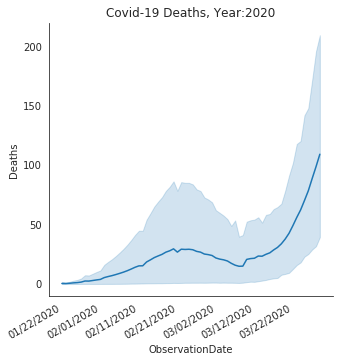

In [15]:
with sns.axes_style('white'):
    g = sns.relplot(x="ObservationDate", y="Deaths" ,kind="line", data=new_data_df)
#     s = sns.relplot(x="Date", y="cumul_Recovered", kind="scatter", data=new_data_df)
    g.fig.autofmt_xdate()
    g.set_xticklabels(step=10)
    plt.title ("Covid-19 Deaths, Year:2020")
#     plt.legend()

We can see the cumulative number in the bright blue and the real number in blue

**Confirmed**

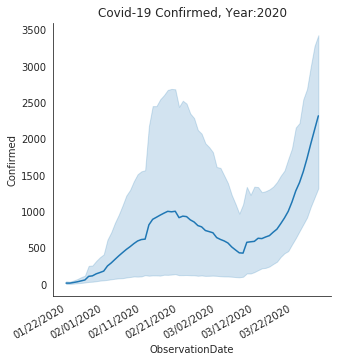

In [16]:
with sns.axes_style('white'):
    g = sns.relplot(x="ObservationDate", y="Confirmed" ,kind="line", data=new_data_df)
    g.fig.autofmt_xdate()
    g.set_xticklabels(step=10)
    plt.title ("Covid-19 Confirmed, Year:2020")

**Recovered**

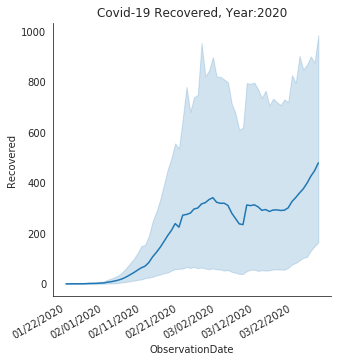

In [17]:
with sns.axes_style('white'):
    g = sns.relplot(x="ObservationDate", y="Recovered" ,kind="line", data=new_data_df)
    g.fig.autofmt_xdate()
    g.set_xticklabels(step=10)
    plt.title ("Covid-19 Recovered, Year:2020")

In [18]:
temp = covid19.groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=True)

fig = px.line(temp, x="ObservationDate", y="Confirmed", color='Country/Region', title='Confirmed Cases Spread by region', height=600)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()


**Let's visualize the countries contracted in a world map**

In [19]:
#converting  lat and long to a format we can work with
cov = gpd.GeoDataFrame(cov_open_list, geometry=gpd.points_from_xy(cov_open_list["longitude"], cov_open_list["latitude"]))
cov.crs = {'init': 'epsg:4326'}

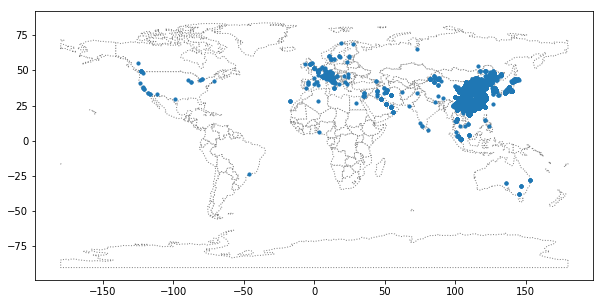

In [20]:
# Load a GeoDataFrame with country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
cov.plot(ax=ax, markersize=10)

**Confirmed cases - Heat map **

In [21]:
m = folium.Map(location=[0,0], zoom_start=2)
# filtered_data['R'] = np.sqrt(data_df['Recovered'])
HeatMap(data=cov_confirmed[['Lat', 'Long', cov_confirmed.columns[-1] ]].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(),\
        radius=15, max_zoom=12).add_to(m)
m

**Dead patients**

In [22]:
m = folium.Map(location=[0,0], zoom_start=2)
# filtered_data['R'] = np.sqrt(data_df['Recovered'])
HeatMap(data=cov_deaths[['Lat', 'Long', cov_deaths.columns[-1] ]].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(),\
        radius=15, max_zoom=12).add_to(m)
m

***Recovered* patients**

In [23]:
# m = folium.Map(location=[0,0], zoom_start=2)
# # filtered_data['R'] = np.sqrt(data_df['Recovered'])
# HeatMap(data=today_data[['Lat', 'Long', 'Recovered']].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(),\
#         radius=15, max_zoom=12).add_to(m)
# m

# * **Choropleth Map ***

In [24]:
# Confirmed
df = covid19[covid19.ObservationDate ==covid19.ObservationDate.max()].drop(['Province/State'], axis = 1)
fig = px.choropleth(df, locations="Country/Region", 
                    locationmode='country names', color=np.log(df["Confirmed"]), 
                    hover_name="Country/Region", hover_data=['Confirmed' , 'Recovered', 'Deaths'],
                    color_continuous_scale='Blues',                   
                    title='Countries with Confirmed Cases in the last day')
# fig.update(layout_coloraxis_showscale=False )
fig.show()

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning:

divide by zero encountered in log



In [25]:
formated_gdf = covid19.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['ObservationDate'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name= "Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread over time confirmed cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

**let's create a marker cluster to see how many cases hapeppened today in each area **

In [26]:
# Create a base map
m = folium.Map(location=[0,0], zoom_start=2)

mc = MarkerCluster()

for idx, row in cov_deaths.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'], row['Long']]))

m.add_child(mc)


In [27]:
fig = px.sunburst(cov_confirmed.sort_values(by=cov_confirmed.columns[-1], ascending=False).reset_index(drop=True), 
                 path=["Country/Region"], values= cov_confirmed.columns[-1], height=700,
                 title='Number of Confirmed cases reported'
                 )
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [28]:
#tbd
temp = covid19.groupby(['ObservationDate','Country/Region'])['ObservationDate','Country/Region','Confirmed','Deaths','Recovered'].sum().reset_index()
temp = temp.sort_values(by = ['ObservationDate','Confirmed'] , ascending = True)
temp = temp.melt(id_vars=['Country/Region', 'ObservationDate'], value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')
fig = px.bar(temp, y='Country/Region', x= 'Count', height=500 ,barmode='group',
              title='World cases', animation_frame='ObservationDate',animation_group="Count",orientation='h',   range_x=[0, 70000])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(yaxis={'categoryorder':'array',
                         'categoryarray':['Country/Region']})
fig.show()

# Analysis on similar epidemics

In [29]:
sars_df = pd.read_csv('../input/sars-outbreak-2003-complete-dataset/sars_2003_complete_dataset_clean.csv')
ebola_df = pd.read_csv('../input/ebola-outbreak-20142016-complete-dataset/ebola_2014_2016_clean.csv')
ebola_d =pd.read_csv('../input/ebola-outbreak-20142016-complete-dataset/ebola_data_db_format.csv')  #cumulative table per cases     

**How many cases where during the SARS**

In [30]:
sars = sars_df.groupby('Date').sum().reset_index()
dd = sars.agg({'Date' : [np.min, np.max]}) #min & max date
sars =  sars[sars.Date == sars.Date.max()]
sars['Global Mortality %'] = sars['Number of deaths']/sars['Cumulative number of case(s)']*100
sars['Global Recovery %'] = sars['Number recovered']/sars['Cumulative number of case(s)']*100
sars.style.background_gradient(cmap='Reds')

,Date,Cumulative number of case(s),Number of deaths,Number recovered,Global Mortality %,Global Recovery %
95,2003-07-11,8432,813,7447,9.64184,88.3183


**Sars Period**

In [31]:
dd.T

,amin,amax
Date,2003-03-17,2003-07-11



**Ebola**

In [32]:
# ebola_df.head(5)

In [33]:
ebola_df.agg({'Date' : [np.min, np.max]}).T

,amin,amax
Date,2014-08-29,2016-03-23


In [34]:
ebola_df.Date =   pd.to_datetime(ebola_df.Date)

In [35]:
# print ('No of death: {}\nNo of cases: {}' .format(ebola_df[ebola_df['Date'] == ebola_df['Date'].max() ].sum()['No. of confirmed deaths'] ,ebola_df.count()['No. of confirmed cases'] ))

Top countries per cases

In [36]:
# ebola_df

In [37]:
ebola_df = ebola_df[ebola_df['Date'] == ebola_df['Date'].max() ]
ebola_df = ebola_df[['Country', 'No. of confirmed cases','No. of confirmed deaths']]
ebola_df  = ebola_df.groupby('Country').sum().sort_values(by = 'No. of confirmed cases', ascending = False).reset_index()
ebola_df['Global Mortality %'] = ebola_df['No. of confirmed deaths']/ebola_df['No. of confirmed cases']*100


In [38]:
print ('No of death: {}\nNo of cases: {}' .format(ebola_df['No. of confirmed deaths'].sum() ,ebola_df['No. of confirmed cases'].sum() ))

No of death: 5684.0
No of cases: 15251.0


In [39]:
fig = px.sunburst(ebola_df.sort_values(by='Global Mortality %', ascending=False).reset_index(drop=True), 
                 path=["Country"], values= 'Global Mortality %', height=500,
                 title='Percentage of Countries contracted by Ebola'
                 )
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [40]:
df = ebola_df.sort_values(by= 'No. of confirmed deaths', ascending=False).head(5).sort_values(by= 'No. of confirmed deaths', ascending=True)
fig = px.bar(df, x= 'No. of confirmed deaths', y="Country", orientation='h'  , text = 'No. of confirmed deaths' , width=700, height=700, range_x = [0,4000])
fig.update_traces(marker_color='olivedrab', opacity=0.8, textposition='outside')
fig.update_layout(
    title={
        'text': "Top Confirmed deaths countries",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [41]:
df = ebola_df.sort_values(by= 'No. of confirmed cases', ascending=False).head(20).sort_values(by= 'No. of confirmed cases', ascending=True)
fig = px.bar(df, x= 'No. of confirmed cases', y="Country", orientation='h'  , text = 'No. of confirmed cases' , width=700, height=700, range_x = [0,9000])
fig.update_traces(marker_color='crimson', opacity=0.8, textposition='outside')
fig.update_layout(
    title={
        'text': "Top Confirmed countries",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()